In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeshu311","key":"a88e0ceec1ef36823b2557d04c9a4683"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d msambare/fer2013 -p /content/

100% 60.3M/60.3M [00:02<00:00, 40.1MB/s]
100% 60.3M/60.3M [00:02<00:00, 27.6MB/s]


In [4]:
!unzip /content/fer2013.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/sad/Training_65242339.jpg  
  inflating: /content/train/sad/Training_65267116.jpg  
  inflating: /content/train/sad/Training_65275626.jpg  
  inflating: /content/train/sad/Training_6529266.jpg  
  inflating: /content/train/sad/Training_65329617.jpg  
  inflating: /content/train/sad/Training_65338712.jpg  
  inflating: /content/train/sad/Training_65338797.jpg  
  inflating: /content/train/sad/Training_65387162.jpg  
  inflating: /content/train/sad/Training_65404494.jpg  
  inflating: /content/train/sad/Training_65426218.jpg  
  inflating: /content/train/sad/Training_65430136.jpg  
  inflating: /content/train/sad/Training_65437377.jpg  
  inflating: /content/train/sad/Training_6545735.jpg  
  inflating: /content/train/sad/Training_65463385.jpg  
  inflating: /content/train/sad/Training_65473985.jpg  
  inflating: /content/train/sad/Training_65502829.jpg  
  inflating: /content/train/sad/Training_65505359.jpg  

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(directory='/content/train_data',image_size=(48,48))

Found 17010 files belonging to 3 classes.


In [14]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(directory='/content/test_data',image_size=(48,48))

Found 4254 files belonging to 3 classes.


happy


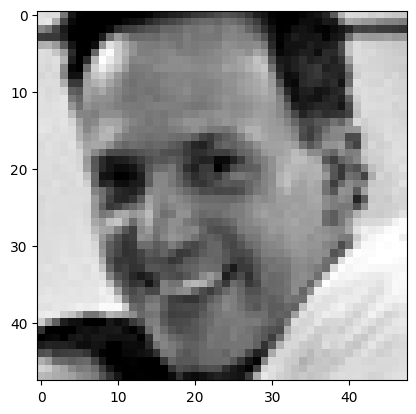

In [8]:
for image,label in dataset.take(1):
    print(dataset.class_names[label[0].numpy()])
    plt.imshow(image[0].numpy().astype('int'))

In [15]:
label_array = []
image_array = []
for imageb,labelb in dataset:
    for label in labelb:
        label_array.append(label.numpy())
    for image in imageb:
        image_array.append(image.numpy())
x = np.array(image_array)
y = np.array(label_array)
x=x.astype('int')

In [16]:
label_array = []
image_array = []
for imageb,labelb in dataset_test:
    for label in labelb:
        label_array.append(label.numpy())
    for image in imageb:
        image_array.append(image.numpy())
x_test = np.array(image_array)
y_test = np.array(label_array)
x_test=x_test.astype('int')

In [17]:
dataset.class_names

['happy', 'neutral', 'sad']

In [ ]:
x_test[0].shape

(48, 48, 3)

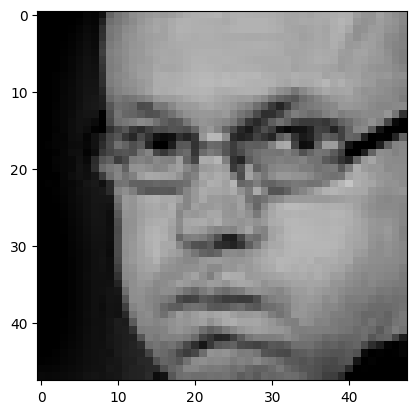

In [ ]:
plt.imshow(x_test[0])

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(48,48,3)))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=3,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r=model.fit(x=x/255,y=y,epochs=20,validation_split=0.3)

Epoch 1/20
373/373 [==============================] - 11s 19ms/step - loss: 1.0535 - accuracy: 0.4633 - val_loss: 0.9881 - val_accuracy: 0.5023
Epoch 2/20
373/373 [==============================] - 7s 18ms/step - loss: 0.8677 - accuracy: 0.5818 - val_loss: 0.8409 - val_accuracy: 0.5951
Epoch 3/20
373/373 [==============================] - 6s 17ms/step - loss: 0.7941 - accuracy: 0.6306 - val_loss: 0.7507 - val_accuracy: 0.6424
Epoch 4/20
373/373 [==============================] - 7s 18ms/step - loss: 0.7415 - accuracy: 0.6672 - val_loss: 0.7457 - val_accuracy: 0.6612
Epoch 5/20
373/373 [==============================] - 6s 17ms/step - loss: 0.7074 - accuracy: 0.6862 - val_loss: 0.7824 - val_accuracy: 0.6267
Epoch 6/20
373/373 [==============================] - 7s 18ms/step - loss: 0.6772 - accuracy: 0.7013 - val_loss: 0.6799 - val_accuracy: 0.6872
Epoch 7/20
373/373 [==============================] - 6s 17ms/step - loss: 0.6498 - accuracy: 0.7163 - val_loss: 1.0829 - val_accuracy: 0.549

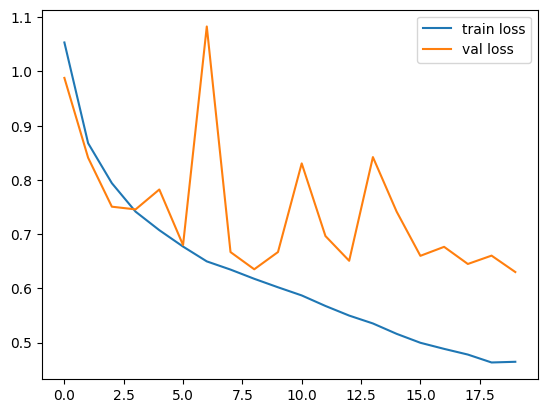

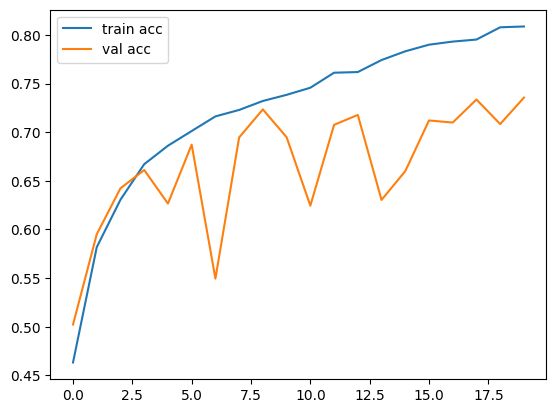

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test/255,y_test)

133/133 [==============================] - 1s 5ms/step - loss: 0.6469 - accuracy: 0.7280


[0.6468743085861206, 0.7280206680297852]

In [22]:
model.save('FERModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
